In [28]:
import numpy as np
import pandas as pd

In [29]:
articles = pd.read_csv('articles.csv')
reddit = pd.read_csv('reddit_posts.csv')

# Processing text data

In [30]:
reddit.head()

,title,text,link
0,Meme Mondays,NaN,https://www.reddit.com//r/datascience/comments...
1,Friendly reminder not to work too hard. You'll...,The year just started and there are already ov...,https://www.reddit.com//r/datascience/comments...
2,Data scientist quits her job at Spotify,In summary and basically talks about how she w...,https://www.reddit.com//r/datascience/comments...
3,XKCD Comic does machine learning,NaN,https://www.reddit.com//r/datascience/comments...
4,I investigated the Underground Economy of Glas...,Online company reviews are high stakes.\n\nTop...,https://www.reddit.com//r/datascience/comments...


In [31]:
reddit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 994 entries, 0 to 993
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   title   994 non-null    object
 1   text    893 non-null    object
 2   link    994 non-null    object
dtypes: object(3)
memory usage: 23.4+ KB


In [32]:
reddit = reddit.dropna().reset_index()

In [33]:
import re

import nltk
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()

from nltk.corpus import stopwords
stop_words = stopwords.words('english')

def text_processing(text):
    
    text = str(text).replace('\n', ' ')
    text = str(text).replace('e.g.', ' ')
    
    text = re.sub('http\S+', '', text)
    text = re.sub('-', '', text)
    text = re.sub(r'[^\w\s]', ' ', text)
    
    text = text.lower()
    
    text = ' '.join([word for word in text.split() if word not in (stop_words)])
    text = ''.join([word for word in text if not word.isdigit()])
    text = re.sub(r'\bds\b', 'data science', text)

    text = lemmatizer.lemmatize(text)
    

    return text

reddit['text'] = reddit['text'].apply(lambda x: text_processing(x))
articles['text'] = articles['text'].apply(lambda x: text_processing(x))

In [34]:
reddit['text'][0]

'year started already k layoffs latest one ups including data professionals corporate people worked hard built career company extremely long period time stayed loyal  merit increases worked extra hours believed contributing better future company laid without second thought cost saving yeah makes much sense right recordbreaking profits every year unattainable goal stupid usa one countries keeps pushing countries leaving us dust quality life remember thinking overtime free going beyond pat back many years earth focus life prioritize always'

# K-means Clustering

https://www.geeksforgeeks.org/clustering-text-documents-using-k-means-in-scikit-learn/

In [52]:
import json 

from sklearn.feature_extraction.text import TfidfVectorizer 
from sklearn.decomposition import PCA 
from sklearn.cluster import KMeans 
import matplotlib.pyplot as plt 
  
  
# create vectorizer 
vectorizer = TfidfVectorizer(stop_words='english') 
  
# vectorizer the text documents 
vectorized_documents = vectorizer.fit_transform(reddit.text) 
  
# # reduce the dimensionality of the data using PCA 
# pca = PCA(n_components=35) 
# reduced_data = pca.fit_transform(vectorized_documents.toarray()) 
  
  
# cluster the documents using k-means 
num_clusters = 35
kmeans = KMeans(n_clusters=num_clusters, n_init=5, 
                max_iter=500, random_state=42) 
kmeans.fit(vectorized_documents) 

KMeans(max_iter=500, n_clusters=35, n_init=5, random_state=42)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


                                              document  cluster
860  jobs data find challenging collect wrange part...       28
325  interview candidate blatantly obvious intervie...       19
840  curious know many features use production mode...       15
296  everyone working large consulting org executiv...        2
282  know lot experience data professionals subredd...        9


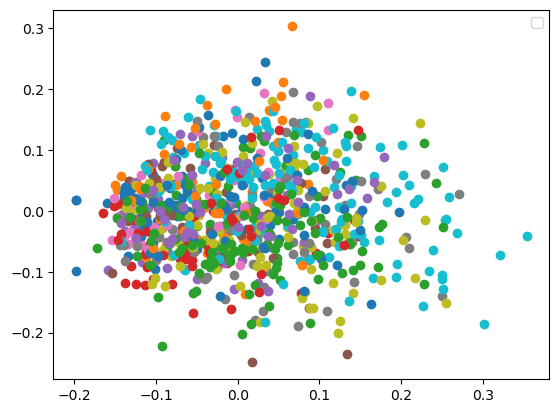

In [53]:
  
# create a dataframe to store the results 
results = pd.DataFrame() 
results['document'] = reddit.text
results['cluster'] = kmeans.labels_ 
  
# print the results 
print(results.sample(5)) 
  
# plot the results 
# colors = ['red', 'green'] 
# cluster = ['Not Sarcastic','Sarcastic'] 
for i in range(num_clusters): 
    plt.scatter(reduced_data[kmeans.labels_ == i, 0], 
                reduced_data[kmeans.labels_ == i, 1]) 
    # plt.scatter(reduced_data[kmeans.labels_ == i, 0], 
    #             reduced_data[kmeans.labels_ == i, 1],  
    #             s=10, color=colors[i],  
    #             label=f' {cluster[i]}') 
plt.legend() 
plt.show()

In [54]:
zero = results.loc[results.cluster == 1].document

In [55]:
zero

163                        thought might interesting ask
206    new field extensive experience statistics busi...
306    sorry odd post completed   courses msds northw...
414                                  food thought please
422    something thought timetotime know correlation ...
535    everyone keeping good work life balance indust...
564    preparing dataset classification task work see...
576    recently started working sales marketing prett...
598    hi changed details make question clearer goes ...
830    largely selftaught data scientist bachelors ec...
883                                              thought
Name: document, dtype: object

In [56]:
import yake

kw_extractor = yake.KeywordExtractor()

for z in zero:
    print(kw_extractor.extract_keywords(z))

[('thought might interesting', 0.04940384002065631), ('thought', 0.15831692877998726), ('interesting', 0.29736558256021506)]
[('statistics business years', 0.006729036199826389), ('business years phd', 0.006729036199826389), ('situation specially social', 0.006729036199826389), ('sort math involved', 0.006729036199826389), ('math involved imo', 0.006729036199826389), ('involved imo suggestion', 0.006729036199826389), ('imo suggestion adapt', 0.006729036199826389), ('suggestion adapt change', 0.006729036199826389), ('adapt change find', 0.006729036199826389), ('made position wanted', 0.006729036199826389), ('position wanted share', 0.006729036199826389), ('extensive experience statistics', 0.009976191211952827), ('experience statistics business', 0.009976191211952827), ('fields situation specially', 0.009976191211952827), ('specially social sciences', 0.009976191211952827), ('social sciences sort', 0.009976191211952827), ('sciences sort math', 0.009976191211952827), ('work path expectat

Finding the optimal value of k
1. Elbow method
2. Silhouette score